In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('16_prep.csv', sep=',')
df

,Успех,Площадь загальна кв.м,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,"Середній дохід наелення,грн",Аптека,Секон хенд,Магазин мобільного звязку,Продуктовий ринок,Речовий ринок
0,0,9.00,1,1,3.0,659.0,77.0,108.0,13884.0,1,0,0,0,0
1,0,30.00,1,1,4.1,1518.0,85.0,750.0,11700.0,1,0,0,0,0
2,0,15.00,1,1,3.0,476.0,112.0,0.0,6786.0,0,0,0,0,0
3,0,20.00,1,1,3.0,1310.0,120.0,0.0,12948.0,0,0,0,0,0
4,0,30.00,1,1,4.0,2029.0,95.0,0.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1,51.77,2,2,4.0,6884.0,107.0,963.0,9399.0,1,0,0,0,0
64,1,27.26,1,1,2.3,4721.0,89.0,0.0,14079.0,1,0,0,1,1
65,0,148.91,1,1,3.0,3286.0,106.0,315.0,11427.0,0,1,0,0,0
66,0,50.93,2,2,4.3,3963.0,168.0,0.0,13338.0,0,0,0,1,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех', 'Площадь загальна кв.м', 'Количество касс', 'Тип', 'Рейтинг в гуглі', 'Количество чеков', 'Средний чек', 'Населення', 'Середній дохід наелення,грн', 'Аптека', 'Секон хенд', 'Магазин мобільного звязку', 'Продуктовий ринок', 'Речовий ринок'
]).round()

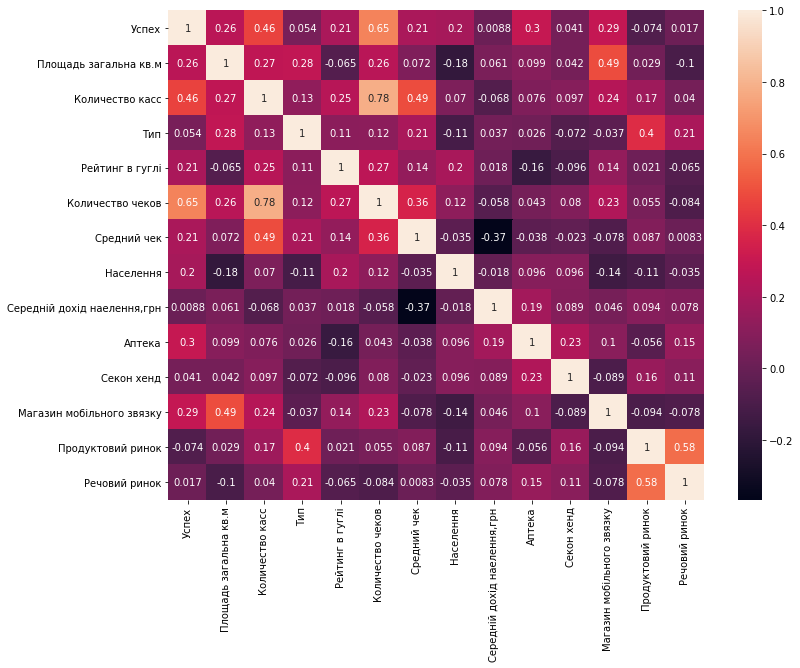

In [8]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Больше всего взаимно зависят друг от друга успех, количество касс и количество чеков.

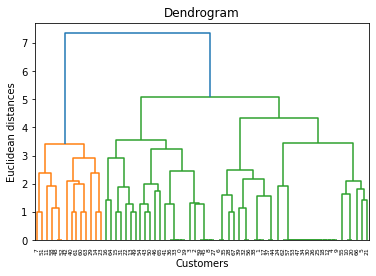

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Здесь я выделила 6 кластеров.

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [11]:
X = df.iloc[:, [0, 2, 5]]

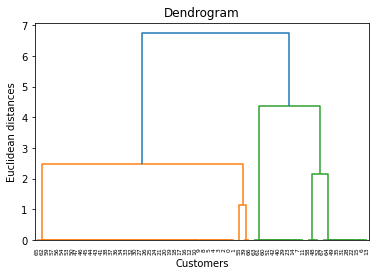

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

# K-Means Clustering

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


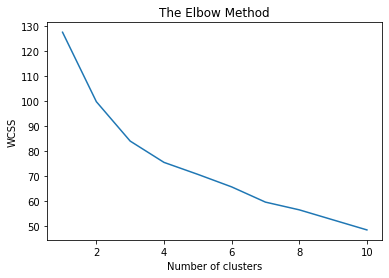

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

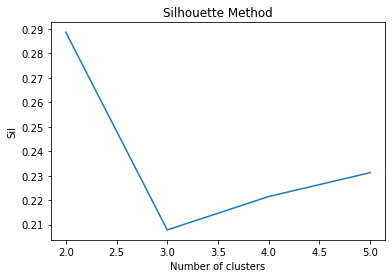

2:0.28857378555321933
3:0.207848680795631
4:0.22148473084781556
5:0.23121926518742414


In [15]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(df)  
    preds = kmeans.fit_predict(df)
    sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
    print(str(i+2) +":"+ str(sil[i]))

In [16]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех', 'Площадь загальна кв.м', 'Количество касс', 'Тип', 'Рейтинг в гуглі', 'Количество чеков', 'Средний чек', 'Населення', 'Середній дохід наелення,грн', 'Аптека', 'Секон хенд', 'Магазин мобільного звязку', 'Продуктовий ринок', 'Речовий ринок']).round(2)

,Успех,Площадь загальна кв.м,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,"Середній дохід наелення,грн",Аптека,Секон хенд,Магазин мобільного звязку,Продуктовий ринок,Речовий ринок
0,0.19,0.04,0.04,0.02,0.64,-0.0,0.06,0.26,0.96,0.42,0.13,0.02,0.15,0.13
1,0.93,0.20,0.80,0.07,0.93,1.0,0.33,0.40,0.93,0.47,0.20,0.13,0.20,0.07


In [19]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['age','income','delays']).round()

,age,income,delays
0,0.0,0.0,-0.0
1,1.0,1.0,1.0


In [20]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.935

Сравнивая результаты кластеризации, можем сделать вывод, что они пересекаются на 94%. 